In [1]:
#Importando librerias a utilizar
%matplotlib inline
import calendar
import matplotlib.pyplot as plt
import pandas as pd

## Examen de Admisión Muestra Progración - Postgrado Ciencia de Datos

#### 2. Leer el archivo (usar el lenguaje de programación de su preferencia).

In [2]:
bikesBD= pd.read_csv('bikes.csv', delimiter=';', encoding='utf-8') #importar CSV con codificacion UTF-8

In [4]:
bikesBD #Mostrando Tabla

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,01/01/2012,35,NaN,0,38,51,26,10,16,NaN
1,02/01/2012,83,NaN,1,68,153,53,6,43,NaN
2,03/01/2012,135,NaN,2,104,248,89,3,58,NaN
3,04/01/2012,144,NaN,1,116,318,111,8,61,NaN
4,05/01/2012,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...,...
305,01/11/2012,2405,NaN,1208,1701,3082,2076,165,2461,NaN
306,02/11/2012,1582,NaN,737,1109,2277,1392,97,1888,NaN
307,03/11/2012,844,NaN,380,612,1137,713,105,1302,NaN
308,04/11/2012,966,NaN,446,710,1277,692,197,1374,NaN


In [6]:
bikesBD.dtypes #Verificando tipo de datos por columna

Date                                    object
Berri 1                                  int64
Brébeuf (données non disponibles)      float64
Côte-Sainte-Catherine                    int64
Maisonneuve 1                            int64
Maisonneuve 2                            int64
du Parc                                  int64
Pierre-Dupuy                             int64
Rachel1                                  int64
St-Urbain (données non disponibles)    float64
dtype: object

#### 3. Graficar la cantidad de bicicletas retiradas por día para la estación 'Berri 1'.

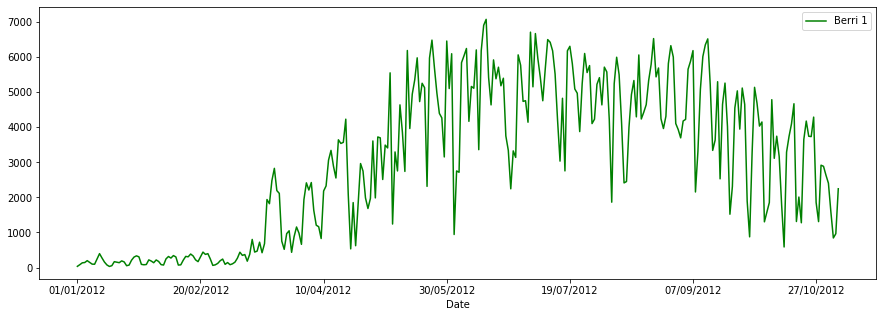

In [8]:
#grafica de lineas para ver informacion de mejor manera, debido a la gran cantidad de datos del eje x
bikesBD.plot(kind='line', x="Date", y="Berri 1", color="green", figsize=(15,5))

#### 4. Extraer el número de trayectos acumulados realizado por estación y por més del año.

In [9]:
bikesBD["Date"] = pd.to_datetime(bikesBD["Date"]) # Convirtiendo la columna "Date" a formato de fecha

In [10]:
bikesBD #mostrando tabla con cambios en columna "Date"

,Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
0,2012-01-01,35,NaN,0,38,51,26,10,16,NaN
1,2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2,2012-03-01,135,NaN,2,104,248,89,3,58,NaN
3,2012-04-01,144,NaN,1,116,318,111,8,61,NaN
4,2012-05-01,197,NaN,2,124,330,97,13,95,NaN
...,...,...,...,...,...,...,...,...,...,...
305,2012-01-11,2405,NaN,1208,1701,3082,2076,165,2461,NaN
306,2012-02-11,1582,NaN,737,1109,2277,1392,97,1888,NaN
307,2012-03-11,844,NaN,380,612,1137,713,105,1302,NaN
308,2012-04-11,966,NaN,446,710,1277,692,197,1374,NaN


In [29]:
#Crenado una nueva tabla Agrupando por fecha mes y sumando los datos de las otras columnas
bikesBDMonth = bikesBD.groupby(bikesBD["Date"].dt.month).sum()

In [30]:
# generando una columna nueva llamada "Mes"
bikesBDMonth["Mes"] = bikesBDMonth.index

In [31]:
# cambiando el numero de mes por su nombre
bikesBDMonth["Mes"] = bikesBDMonth["Mes"].apply(lambda x: calendar.month_abbr[x])

In [32]:
bikesBDMonth.set_index('Mes', inplace=True) #colocando la columna "Mes", como nuevo index

In [33]:
bikesBDMonth #Mostrando la tabla bikesBDMonth

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Mes,,,,,,,,,
Jan,30911,0.0,10977,20317,36384,18815,10694,27379,0.0
Feb,31723,0.0,11337,20849,39018,20420,11236,27096,0.0
Mar,54117,0.0,24550,36616,67384,38369,19656,56975,0.0
Apr,72016,0.0,30594,51578,89620,47341,18092,73170,0.0
May,125885,0.0,51194,87200,145527,74148,47305,118044,0.0
Jun,120329,0.0,47647,76956,138496,70140,50461,117547,0.0
Jul,127266,0.0,47645,80400,146683,70165,58687,119567,0.0
Aug,119037,0.0,50554,78171,133731,68156,42826,112635,0.0
Sep,98526,0.0,43584,64830,114483,68522,28803,96071,0.0
